 ## Installing and Loading Packages

In [1]:
# Python version used in this project
from platform import python_version
print('Python Version used in this Jupiter Nootebook:', python_version())

Python Version used in this Jupiter Nootebook: 3.9.13


In [ ]:
! pip install yfinance --upgrade --no-cache-dir

In [ ]:
! pip install pandas-datareader

In [ ]:
! pip install xlwt

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Packages versions used in this project
%reload_ext watermark
%watermark -a "Flavio F Ribeiro" --iversions

Author: Flavio F Ribeiro

pandas           : 1.4.4
matplotlib       : 3.5.2
sqlite3          : 2.6.0
pandas_datareader: 0.10.0
numpy            : 1.21.5
yfinance         : 0.2.11



In [ ]:
#Create the variable for the company stock data

In [4]:
AZN = "AZN"

In [7]:
AZN = yfinance.download(AZN)

[*********************100%***********************]  1 of 1 completed


## Exploratorion and Data Integrity Check

In [ ]:
AZN.shape

In [ ]:
AZN.head()

In [ ]:
AZN.describe()

In [ ]:
AZN.info()

## Using SQL

In [8]:
conn = sqlite3.connect("StockPrices/AZN.db")
c = conn.cursor()

In [9]:
AZN.to_sql("AZN", conn, if_exists = 'replace')

7495

In [16]:
# SQL query to DataFrame
dfc = pd.read_sql_query(""" SELECT * FROM AZN WHERE Date >= "2020-01-01" """, conn)

In [17]:
dfc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02 00:00:00,50.299999,50.490002,50.130001,50.389999,46.576225,3587300
1,2020-01-03 00:00:00,49.880001,50.380001,49.830002,50.090000,46.298927,1208700
2,2020-01-06 00:00:00,50.040001,50.220001,49.740002,49.880001,46.104820,1992300
3,2020-01-07 00:00:00,50.139999,50.299999,49.869999,50.070000,46.280434,1871900
4,2020-01-08 00:00:00,49.869999,50.169998,49.750000,49.950001,46.169521,1869000
...,...,...,...,...,...,...,...
781,2023-02-08 00:00:00,65.269997,65.279999,64.199997,64.360001,64.360001,5036800
782,2023-02-09 00:00:00,68.309998,68.589996,67.279999,67.419998,67.419998,8368000
783,2023-02-10 00:00:00,68.610001,69.000000,68.209999,68.879997,68.879997,5918200
784,2023-02-13 00:00:00,68.529999,69.769997,68.500000,69.709999,69.709999,5003600


In [22]:
#Saves as .xls in case we want to whole period
dfc.to_excel("StockPrices/AZNbth2020.xls")

In [24]:
#loads in disc
dfc = pd.read_excel("StockPrices/AZNbth2020.xls")

In [25]:
dfc.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2020-01-02 00:00:00,50.299999,50.490002,50.130001,50.389999,46.576225,3587300
1,1,2020-01-03 00:00:00,49.880001,50.380001,49.830002,50.090000,46.298927,1208700
2,2,2020-01-06 00:00:00,50.040001,50.220001,49.740002,49.880001,46.104820,1992300
3,3,2020-01-07 00:00:00,50.139999,50.299999,49.869999,50.070000,46.280434,1871900
4,4,2020-01-08 00:00:00,49.869999,50.169998,49.750000,49.950001,46.169521,1869000


In [26]:
#Checking 'Date' format.
dfc['Date']

0      2020-01-02 00:00:00
1      2020-01-03 00:00:00
2      2020-01-06 00:00:00
3      2020-01-07 00:00:00
4      2020-01-08 00:00:00
              ...         
781    2023-02-08 00:00:00
782    2023-02-09 00:00:00
783    2023-02-10 00:00:00
784    2023-02-13 00:00:00
785    2023-02-14 00:00:00
Name: Date, Length: 786, dtype: object

In [34]:
#Transforming the Date to datetime format
dfc['Date'] = pd.to_datetime(dfc['Date'])

In [31]:
dfc['Date']

0     2020-01-02
1     2020-01-03
2     2020-01-06
3     2020-01-07
4     2020-01-08
         ...    
781   2023-02-08
782   2023-02-09
783   2023-02-10
784   2023-02-13
785   2023-02-14
Name: Date, Length: 786, dtype: datetime64[ns]

In [32]:
#Checking 'Close' format
dfc['Close']

0      50.389999
1      50.090000
2      49.880001
3      50.070000
4      49.950001
         ...    
781    64.360001
782    67.419998
783    68.879997
784    69.709999
785    69.919998
Name: Close, Length: 786, dtype: float64

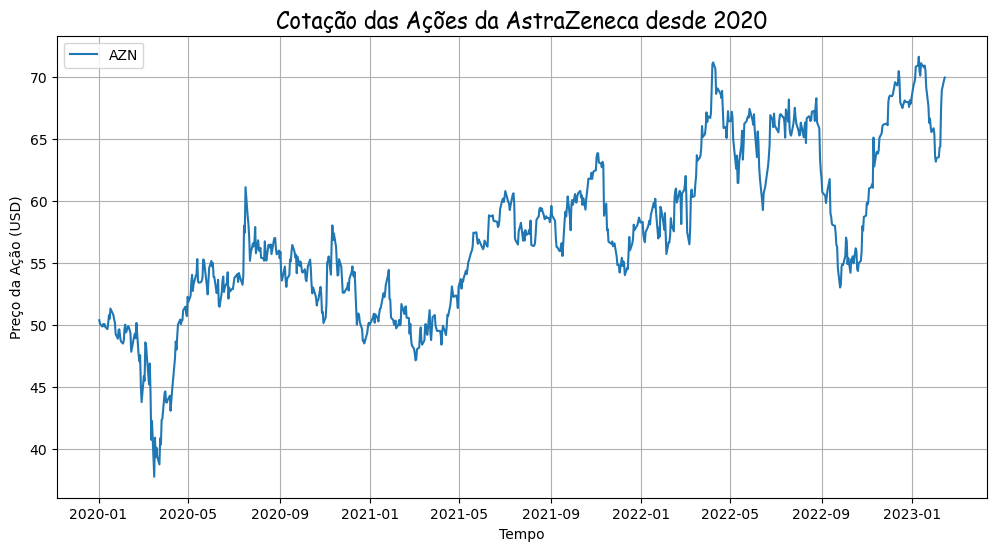

In [36]:
#Data Visualization

# Data in axis
x = dfc['Date']
y = dfc['Close']

# Graph's size (dpi)
plt.figure(figsize = (12,6), dpi = 100)

# Plot
plt.plot(x, y, label = 'AZN')

# Title
plt.title('Cotação das Ações da AstraZeneca desde 2020', 
          fontdict = {'fontname': 'Comic Sans MS', 'fontsize': 16})

# Label
plt.xlabel('Tempo')
plt.ylabel('Preço da Ação (USD)')

# legend = on
plt.legend()

#Grid = on
plt.grid()

# Saves image n high resolution
plt.savefig('imagens/AZNSockPricefrom2020.png', dpi = 300)

# Plot
plt.show()